### 1. Using the wand.image Python package, simulate other mechanisms for distortions (For example, the Barrel distortion, as described in the next image).

In [1]:
!pip install Wand
!pip install numpy
!pip install opencv-python

You should consider upgrading via the 'C:\Users\GeorgeS\Documents\facultate\master\an1\s2\UAIC_FII_CV\pythonProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\GeorgeS\Documents\facultate\master\an1\s2\UAIC_FII_CV\pythonProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\GeorgeS\Documents\facultate\master\an1\s2\UAIC_FII_CV\pythonProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


The original image.

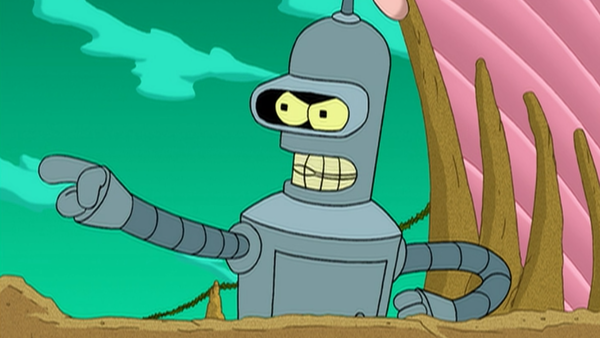

In [2]:
from wand.image import Image

img =  Image(filename="bender.png")
img

The 4 parameters of the *barrel* distortion (A, B, C, D) are:

$R_{src} = r * ( A* r^3 + B * r^2 + C*r + D )$

r is the destination radius and $R_{src}$ is the source pixel.

Barrel distortion is used for correcting spherical lens distortions.

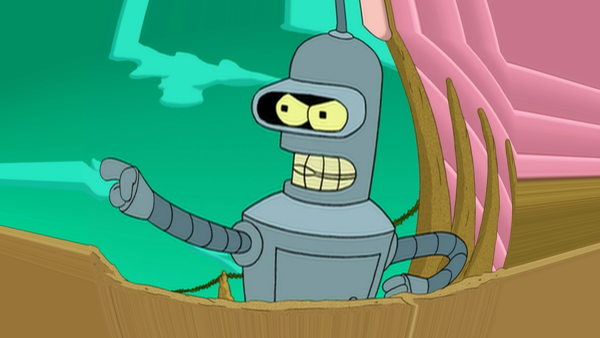

In [3]:
img =  Image(filename="bender.png")
img.distort('barrel', (0.1, 0.1, 0.0, 1.0))
img

Inverse barrel distortions.

$R_{src} = r / ( A*r^3 + B*r^2 + C*r + D )$

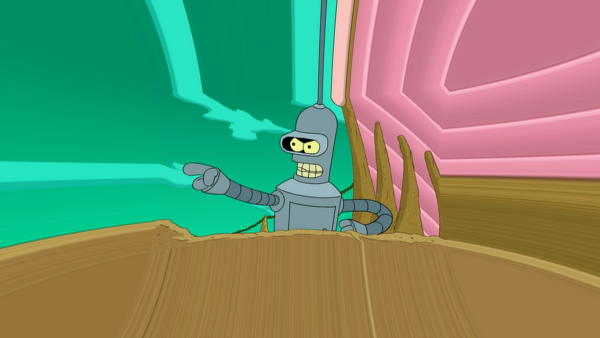

In [4]:
img =  Image(filename="bender.png")
img.distort('barrel_inverse', (0.0, 0.1, 0.0, 0.4))
img

Affine Projection has 6 parameters: $s_x$, $r_x$, $r_y$, $s_y$, $t_x$, $t_y$ (Scale, Rotate, Translate).

$X_d = s_x*X_s + r_y*Y_s + t_x$

$Y_d = r_x*X_s + s_y*Y_s + t_y$

$X_s$ and $Y_s$ are the source image coordinates while $x_d$ and $y_d$ are the destination image coordinates.

Affine projection allows changing perspective.


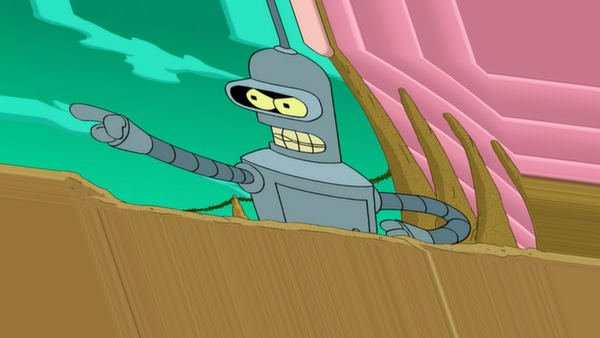

In [5]:
img =  Image(filename="bender.png")
img.distort('affine_projection', (0.8, 0.1, 0.2,  0.6, 5, 5))
img

Arc distortion will curve the image with the given arc.

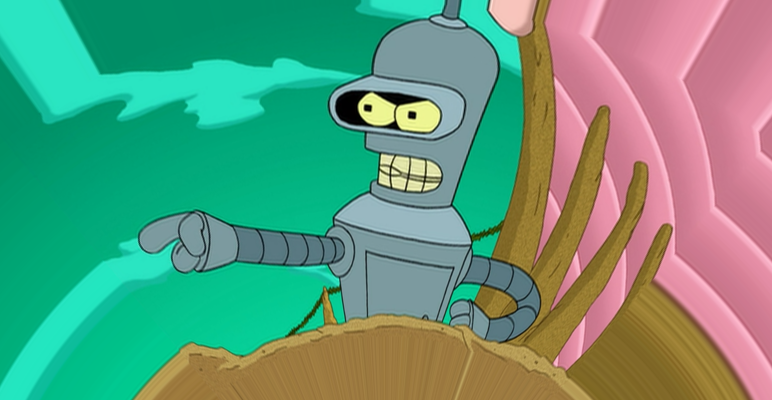

In [6]:
img =  Image(filename="bender.png")
img.distort('arc', (80,))
img

2. Deploy the OpenCV camera calibration tool on the given checkerboard image.

In [7]:
import matplotlib.pyplot as plt
# Source: https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
import numpy as np
import cv2 as cv
import glob
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
imgs = []
images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        imgs.append(img)


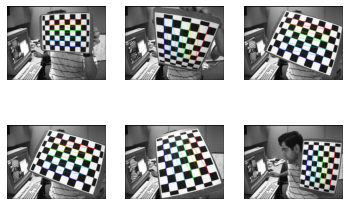

In [8]:
for num, x in enumerate(imgs):
    if num > 5:
        break
    plt.subplot(2,3,num+1)
    plt.axis('off')
    plt.imshow(x)

True


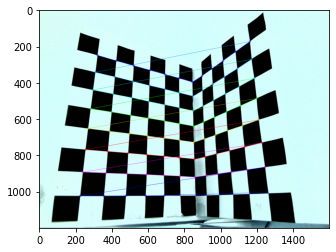

In [9]:
img = cv.imread("image001.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (12,8), None) # 13 pe line, 9 per column
print(ret)
if ret == True:
    corners2 = cv.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)
    cv.drawChessboardCorners(img, (12,8), corners2, ret)
plt.imshow(img)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

* We use findChessboardCorners with size = (12,8) because we have 13 squares per line and 9 per column.

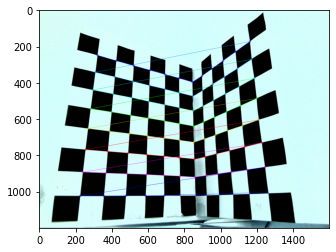

In [10]:
plt.imshow(img)
plt.show()
